# Tracé des RVI
Le RVI est un indicateur de végétation calculé à partir des données SAR.

In [2]:
import os
import pandas as pd
from tqdm.notebook import tqdm

import sentry

import matplotlib.pyplot as plt
import matplotlib.dates as mdt
from matplotlib.patches import Rectangle
%matplotlib inline

plt.rcParams["figure.figsize"] = (9,6)

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
target = "../data/Barro-Alto"

Le répertoire source contient la zone d'intérêt, les fichiers SAFE .zip téléchargés et un fichier json : "geozone.json" qui décrit les éléments de décompression et la partie à extraire.

In [5]:
zone = sentry.getzone(target)
zone

{'name': 'Barro Alto Nickel Mine (Brasil)',
 'bbox': [-15.12, -49.06, -15.02, -48.92],
 'step': 10,
 'GRD': '/Volumes/JLTD/Sentinel/GRD/Barro-Alto',
 'FCOVER': '/Volumes/JLTD/Sentinel/FCOVER',
 'NDVI': '/Volumes/JLTD/Sentinel/NDVI',
 'target': '../data/Barro-Alto'}

In [13]:
sentry.dataset.rvicompute(zone) #,renew=True)

0it [00:00, ?it/s]

In [14]:
R = sentry.dataset.rvi(zone)

In [15]:
R

,RVI,RMSE,INCIDENCE,ELEVATION,DIRECTION,DLAT,DLON,ZIPFILE
DATE,,,,,,,,
2019-06-24,2.024882,0.016118,17.564305,15.647990,-1,0.059395,0.987299,S1A_IW_GRDH_1SDV_20190624T085316_20190624T0853...
2019-08-11,2.023578,0.015742,17.542523,15.628676,-1,0.059485,0.988373,S1A_IW_GRDH_1SDV_20190811T085319_20190811T0853...
2019-08-30,2.017972,0.012146,24.283702,21.349498,-1,0.348239,-1.003929,S1A_IW_GRDH_1SDV_20190830T084511_20190830T0845...
2019-09-16,2.022600,0.015615,17.640682,15.716034,-1,0.059595,0.987222,S1A_IW_GRDH_1SDV_20190916T085321_20190916T0853...
2019-09-23,2.017765,0.012284,24.152574,21.234440,-1,0.347998,-1.002553,S1A_IW_GRDH_1SDV_20190923T084512_20190923T0845...
...,...,...,...,...,...,...,...,...
2021-02-20,2.023011,0.015419,24.389038,21.441917,-1,0.348156,-1.002196,S1A_IW_GRDH_1SDV_20210220T084515_20210220T0845...
2021-02-25,2.028751,0.018692,17.724768,15.791391,-1,0.059773,0.987176,S1A_IW_GRDH_1SDV_20210225T085324_20210225T0853...
2021-03-04,2.022170,0.013826,24.543407,21.577595,-1,0.348241,-1.002417,S1A_IW_GRDH_1SDV_20210304T084515_20210304T0845...


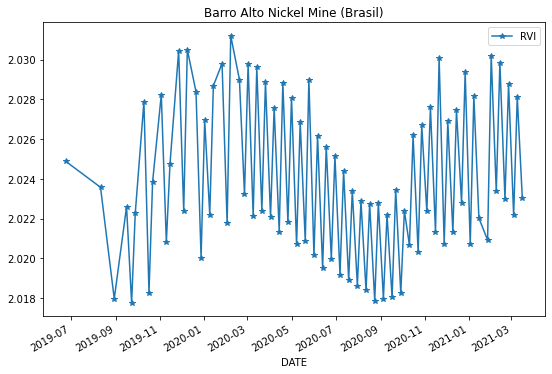

In [63]:
R['RVI'].plot(style='-*',legend=True)
plt.title(zone['name']);

In [17]:
rvi = R['RVI']

In [18]:
rvi.index

DatetimeIndex(['2019-06-24', '2019-08-11', '2019-08-30', '2019-09-16',
               '2019-09-23', '2019-09-28', '2019-10-10', '2019-10-17',
               '2019-10-22', '2019-11-03', '2019-11-10', '2019-11-15',
               '2019-11-27', '2019-12-04', '2019-12-09', '2019-12-21',
               '2019-12-28', '2020-01-02', '2020-01-09', '2020-01-14',
               '2020-01-26', '2020-02-02', '2020-02-07', '2020-02-19',
               '2020-02-26', '2020-03-02', '2020-03-09', '2020-03-14',
               '2020-03-21', '2020-03-26', '2020-04-02', '2020-04-07',
               '2020-04-14', '2020-04-19', '2020-04-26', '2020-05-01',
               '2020-05-08', '2020-05-13', '2020-05-20', '2020-05-25',
               '2020-06-01', '2020-06-06', '2020-06-13', '2020-06-18',
               '2020-06-25', '2020-06-30', '2020-07-07', '2020-07-12',
               '2020-07-19', '2020-07-24', '2020-07-31', '2020-08-05',
               '2020-08-12', '2020-08-17', '2020-08-24', '2020-08-29',
      

## Récupération de FCOVER

In [19]:
# sentry.dataset.glscompute(zone,'FCOVER')

In [20]:
F = sentry.gls(zone,'FCOVER')

In [21]:
fcover = F['FCOVER']

In [72]:
rmse = F['RMSE']

In [22]:
fcover.index

DatetimeIndex(['2016-01-10', '2016-01-20', '2016-01-31', '2016-02-10',
               '2016-02-20', '2016-02-29', '2016-03-10', '2016-03-20',
               '2016-03-31', '2016-04-10',
               ...
               '2020-11-10', '2020-11-20', '2020-11-30', '2020-12-10',
               '2020-12-20', '2020-12-31', '2021-01-10', '2021-01-20',
               '2021-01-31', '2021-02-10'],
              dtype='datetime64[ns]', name='DATE', length=174, freq=None)

## On fait un affichage superposé des deux indices.

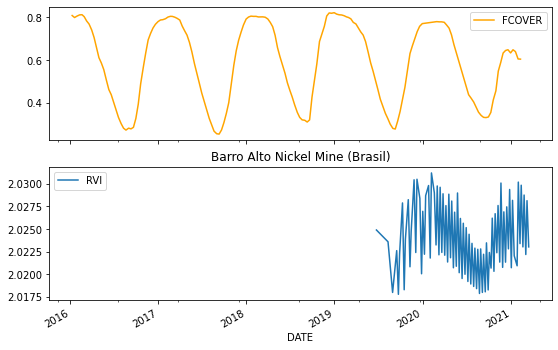

In [52]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
plt.title(zone['name'])
fcover.plot(ax=ax1,color='orange')
rvi.plot(ax=ax2)
ax1.legend(['FCOVER'])
ax2.legend(['RVI']);

## Apprentissage de la transformation du RVI
On cherche à recoller avec FCOVER.
Il faut prendre en compte l'angle de balayage.

In [24]:
from scipy.interpolate import interp1d

In [25]:
x = rvi.index
ry0 = rvi.values
ry = (ry0-min(ry0))/((max(ry0)-min(ry0)))

In [26]:
Fc = interp1d(pd.to_numeric(fcover.index),fcover.values,fill_value="extrapolate")

In [27]:
fy = Fc(pd.to_numeric(x))

In [74]:
Fe = interp1d(pd.to_numeric(rmse.index),rmse.values,fill_value="extrapolate")
fe = Fe(pd.to_numeric(x))

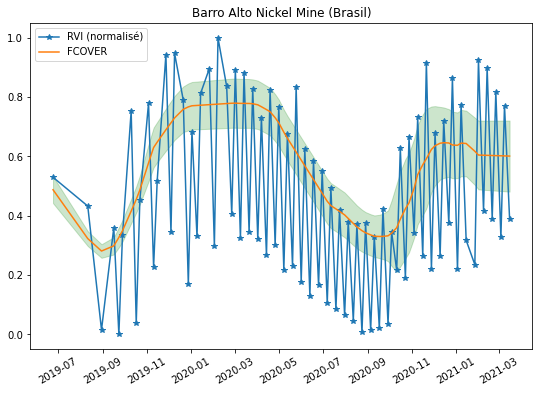

In [75]:
fig,ax = plt.subplots()
plt.plot(x,ry,'-*')
plt.plot(x,fy)
ax.fill_between(x,fy-fe,fy+fe,color='g',alpha=0.2)
plt.xticks(rotation=30)
ax.legend(['RVI (normalisé)','FCOVER'])
plt.title(zone['name']);

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
M = R[['RVI','INCIDENCE','ELEVATION','DLAT','DLON']].copy()
M['FCOVER'] = fy

In [31]:
res = smf.ols('FCOVER ~ RVI + DLAT + DLON', data=M).fit()

In [32]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 FCOVER   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.47
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           2.69e-20
Time:                        15:57:25   Log-Likelihood:                 87.548
No. Observations:                  88   AIC:                            -167.1
Df Residuals:                      84   BIC:                            -157.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.5113     14.987     -5.039      0.000    -105.314     -45.709
RVI           53.5439      4.328     12.373      0.000      44.938      62.150
DLAT        -159.0630     55.027     -2.891      0.005    -268.490     -49.636
DLON         -23.2362      7.980     -2.912      0.005     -39.105      -7.367
==============================================================================
Omnibus:                        0.410   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.574
Skew:                          -0.096   Prob(JB):                        0.751
Kurtosis:                       2.654   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

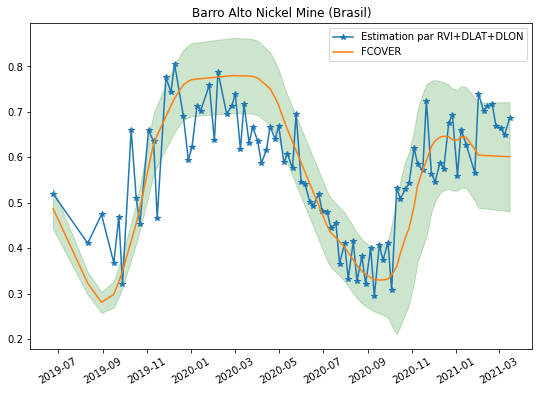

In [76]:
fig,ax = plt.subplots()
plt.plot(x,res.fittedvalues,'-*')
plt.plot(x,fy)
ax.fill_between(x,fy-fe,fy+fe,color='g',alpha=0.2)
plt.xticks(rotation=30)
ax.legend(['Estimation par RVI+DLAT+DLON','FCOVER'])
plt.title(zone['name']);

##  Corrélations

In [77]:
from scipy.stats import kendalltau

In [80]:
tau0,pval0 = kendalltau(fy,ry0)
(tau0,pval0)

(0.31818181818181823, 1.1346256977424921e-05)

In [79]:
tau,pval = kendalltau(fy,res.fittedvalues) 
(tau,pval)

(0.5783699059561129, 1.4697229926158492e-15)

In [34]:
resi = smf.ols('RVI ~ DLAT + DLON',data=M).fit()

In [35]:
resi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RVI   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     80.07
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           2.81e-20
Time:                        15:58:08   Log-Likelihood:                 411.42
No. Observations:                  88   AIC:                            -816.8
Df Residuals:                      85   BIC:                            -809.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3299      0.278      8.384      0.000       1.777       2.882
DLAT          -1.5084      1.369     -1.101      0.274      -4.231       1.214
DLON          -0.2157      0.199     -1.086      0.281      -0.611       0.179
==============================================================================
Omnibus:                        8.974   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                4.512
Skew:                          -0.335   Prob(JB):                        0.105
Kurtosis:                       2.116   Cond. No.                     5.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

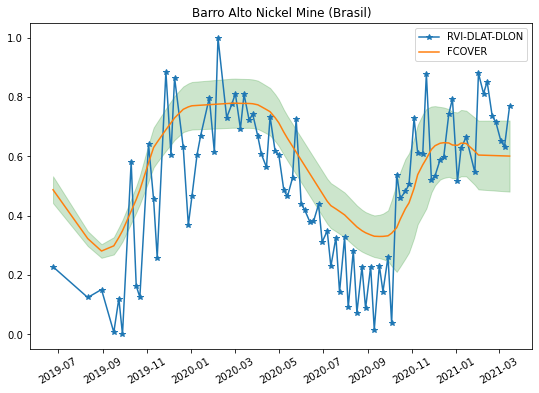

In [84]:
fig,ax = plt.subplots()
dry0 = ry0-resi.fittedvalues
dry = (dry0-dry0.min())/(dry0.max()-dry0.min())
plt.plot(x,dry,'-*')
plt.plot(x,fy)
ax.fill_between(x,fy-fe,fy+fe,color='g',alpha=0.2)
plt.xticks(rotation=30)
ax.legend(['RVI-DLAT-DLON','FCOVER'])
plt.title(zone['name']);

In [83]:
tau1,pval1 = kendalltau(fy,dry0)
(tau1,pval1)

(0.5370950888192269, 1.2628471085662496e-13)

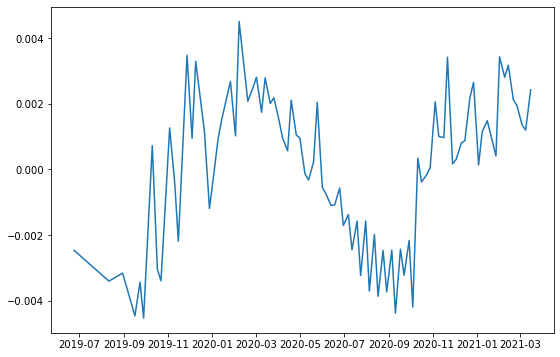

In [47]:
plt.plot(x,ry0-resi.fittedvalues)

## Lissage

In [85]:
from scipy.signal import savgol_filter

(0.6081504702194358, 4.847845385411755e-17)

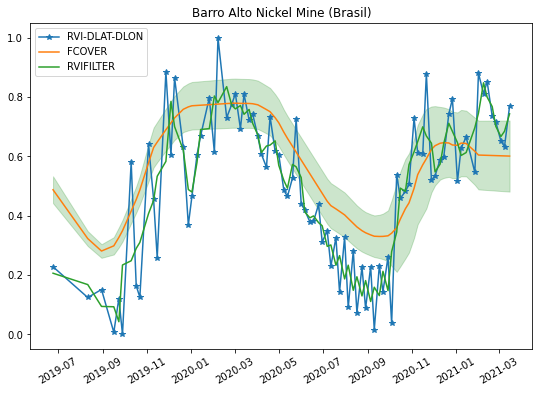

In [130]:
hdry = savgol_filter(dry,3,1)

fig,ax = plt.subplots()
dry0 = ry0-resi.fittedvalues
dry = (dry0-dry0.min())/(dry0.max()-dry0.min())
plt.plot(x,dry,'-*')
plt.plot(x,fy)
ax.fill_between(x,fy-fe,fy+fe,color='g',alpha=0.2)
plt.plot(x,hdry)
plt.xticks(rotation=30)
ax.legend(['RVI-DLAT-DLON','FCOVER','RVIFILTER'])
plt.title(zone['name']);
tau2,pval2 = kendalltau(fy,hdry)
tau2,pval2

(0.6202462380300957, 2.7774759862874964e-17)

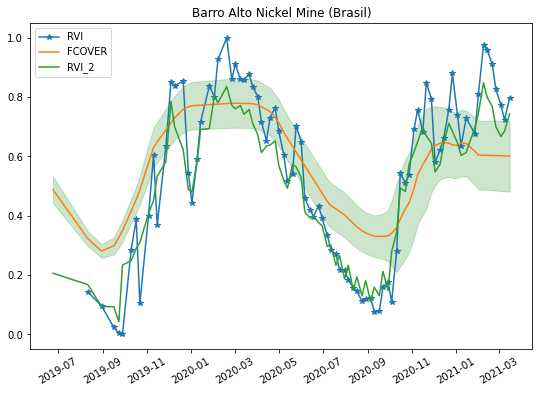

In [136]:
n=2
dry0 = ry0-resi.fittedvalues
rrvi0 = dry0.rolling(window=n).mean()
dry = (rrvi0-rrvi0.min())/(rrvi0.max()-rrvi0.min())

fig,ax = plt.subplots()
plt.plot(x,dry,'-*')
plt.plot(x,fy)
ax.fill_between(x,fy-fe,fy+fe,color='g',alpha=0.2)
plt.plot(x,hdry)
plt.xticks(rotation=30)
ax.legend(['RVI','FCOVER','RVI_2'])
plt.title(zone['name']);

tau,pvalue = kendalltau(fy[n:],rrvi[n:])
tau,pvalue

## Chargement de NDVI

In [172]:
sentry.dataset.glscompute(zone,'NDVI')

0it [00:00, ?it/s]

In [173]:
NDVI = sentry.gls(zone,'NDVI')

In [175]:
ndvi = NDVI['NDVI']

<AxesSubplot:xlabel='DATE'>

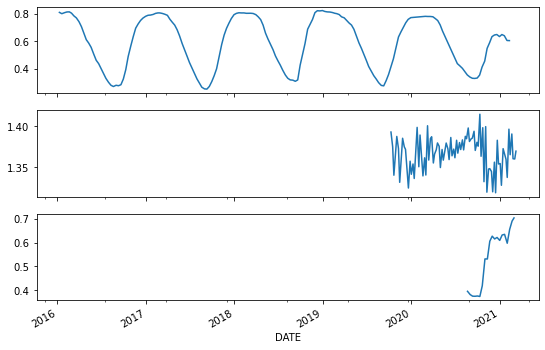

In [176]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)
fcover.plot(ax=ax1)
rvi.plot(ax=ax2)
ndvi.plot(ax=ax3)